In [2]:
import torch
# nn contains all of PyTorch's building blocks for neural networks
from torch import nn

import matplotlib.pyplot as plt
import torch.nn.functional as F
import numpy as np

In [ ]:
x = torch.ones(1)
w = torch.full([1], 2.,    requires_grad=True)
mse = F.mse_loss(torch.ones(1), x*w)
w.requires_grad_()
torch.tensor([2.], requires_grad=True)
mse = F.mse_loss(torch.ones(1), x*w)
torch.autograd.grad(mse, [w])

(tensor([2.]),)

In [ ]:
x = torch.ones(1)
w = torch.full([1], 2.)
w.requires_grad_()

torch.tensor([2.], requires_grad=True)
mse = F.mse_loss(torch.ones(1), x*w)
mse.backward()
w.grad

tensor([2.])

# soft max

In [37]:
a = torch.rand(3, requires_grad=True)
a

tensor([0.4126, 0.6725, 0.0981], requires_grad=True)

In [38]:
p = F.softmax(a, dim=0)
torch.autograd.grad(p[1], [a], retain_graph=True)

(tensor([-0.1415,  0.2449, -0.1033]),)

In [39]:
torch.autograd.grad(p[2], [a])

(tensor([-0.0797, -0.1033,  0.1830]),)

# 感知机

In [ ]:
x = torch.randn(1,    10)
w = torch.randn(1,     1 0 , requires_grad=True)
o = torch.sigmoid(x@w.t())
o.shape

torch.Size([1, 1])

In [ ]:
loss = F.mse_loss(torch.ones(1,    1), o)
print(loss)
loss.shape

tensor(0.7187, grad_fn=<MseLossBackward0>)


torch.Size([])

In [42]:
loss.backward()

In [43]:
w.grad

tensor([[ 0.1678, -0.1769,  0.2782,  0.1175,  0.6091,  0.1297, -0.1257, -0.0728,
          0.0765,  0.2788]])

In [ ]:
x = torch.randn(1,    10)
w = torch.randn(2,     1 0 , requires_grad=True)
o = torch.sigmoid(x@w.t())
loss = F.mse_loss(torch.ones(1,    2), o)
loss

tensor(0.0305, grad_fn=<MseLossBackward0>)

In [45]:
loss.backward()
w.grad

tensor([[ 0.0035,  0.0052,  0.0023, -0.0039, -0.0021, -0.0026, -0.0031,  0.0037,
          0.0054, -0.0009],
        [ 0.0481,  0.0706,  0.0321, -0.0537, -0.0282, -0.0362, -0.0425,  0.0511,
          0.0736, -0.0120]])

# chain rule

In [ ]:
x = torch.tensor(1.)
w1 = torch.tensor(2.,    requires_grad=True)
b1 = torch.tensor(1.)
w2 = torch.tensor(2.,    requires_grad=True)
b2 = torch.tensor(1.)
y1 = w1*x + b1
y2 = w2*y1 + b2

dy2_dy1 = torch.autograd.grad(y2, [y1], retain_graph=True)[0]
dy1_dw1 = torch.autograd.grad(y1, [w1], retain_graph=True)[0]

dy2_dw1 = torch.autograd.grad(y2, [w1], retain_graph=True)[0]

dy2_dy1 * dy1_dw1

tensor(2.)

In [47]:
dy2_dw1

tensor(2.)

# 2D函数优化

(120,) (120,)
(120, 120) (120, 120)


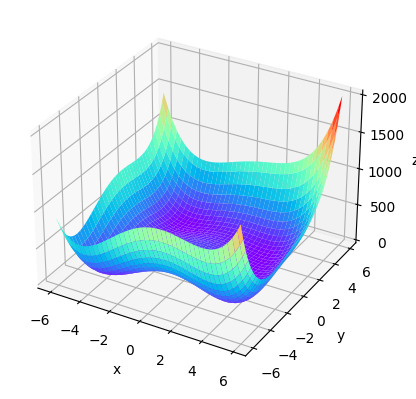

In [ ]:
def himmelbau(x):
    return (x[0] ** 2 + x[1] - 11) ** 2 + (x[0] + x[1] ** 2 - 7) ** 2


x = np.arange(-6, 6, 0.1)
y = np.arange(-6, 6, 0.1)
print(x.shape, y.shape)
X, Y = np.meshgrid(x, y)
print(X.shape, Y.shape)
Z = himmelbau([X, Y])

fig = plt.figure('himmelbau')
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='rainbow')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

In [ ]:
x = torch.tensor([0.,    0.], requires_grad=True)

optimizer = torch.optim.Adam([x], lr=1e-3)

for i in range(20000):
    gred = himmelbau(x)
    optimizer.zero_grad()
    gred.backward()
    optimizer.step()
    if i % 2000 == 0:
        print(f'x: {x}, gred: {gred}')

x: tensor([0.0010, 0.0010], requires_grad=True), gred: 170.0
x: tensor([2.3332, 1.9541], requires_grad=True), gred: 13.730901718139648
x: tensor([2.9820, 2.0271], requires_grad=True), gred: 0.014858869835734367
x: tensor([3.0000, 2.0000], requires_grad=True), gred: 1.1074007488787174e-08
x: tensor([3.0000, 2.0000], requires_grad=True), gred: 1.5572823031106964e-09
x: tensor([3.0000, 2.0000], requires_grad=True), gred: 1.8189894035458565e-10
x: tensor([3.0000, 2.0000], requires_grad=True), gred: 1.6370904631912708e-11
x: tensor([3.0000, 2.0000], requires_grad=True), gred: 1.8189894035458565e-12
x: tensor([3., 2.], requires_grad=True), gred: 0.0
x: tensor([3., 2.], requires_grad=True), gred: 0.0


# Numercal stablity

In [7]:
x = torch.randn(1, 784)
w = torch.randn(10, 784)

logits = x@w.t()

logits

tensor([[-45.7860,  38.6957,  14.1577,  25.3394,  10.0946,  37.9808,  10.9874,
         -44.3710,  22.1372,  22.3553]])

In [8]:
pred = torch.softmax(logits, dim=1)
pred

tensor([[1.3711e-37, 6.7148e-01, 1.4802e-11, 1.0628e-06, 2.5451e-13, 3.2852e-01,
         6.2150e-13, 5.6443e-37, 4.3229e-08, 5.3760e-08]])

In [10]:
pred_log = torch.log(pred)

In [ ]:
F.cross_entropy(logits, torch.tensor([3]))
# F.cross_entropy(pred, torch.tensor([3])) 2
# 这里不能使用pred，因为pred是概率分布，不是logits，cross_entropy需要已经经过softmax的logits

tensor(13.7546)

In [11]:
F.nll_loss(pred_log, torch.tensor([3]))

tensor(13.7546)